# Create a random number generator that is uniformly distributed

## Create a basic random number generator for range (0.0 to 1.0)

### Create a basic seed generator that uses current timestamp

In [203]:
import time
def getSeed(x1:int = 1234, x2:int = 3456 , x3:int = 6789):
    a = int(time.time() * 1000) #Get current time as millisecond
    x = a % x1
    y = a % x2
    z = a % x3
    return x if x != 0 else x1,y if y!= 0 else x2,z if z!= 0 else x3

### Create an uniformly distributed random generator with Wichmann–Hill Algorithm

In [204]:
def random(seed:[int]):
    x = (171 * seed[0]) % 30269
    y = (172 * seed[1]) % 30307
    z = (170 * seed[2]) % 30323
    return (x/30269 + y/30307 + z/30323) % 1

In [205]:
random(getSeed())

0.002975423408943856

## Create a uniform distribuation based random number in range a,b

In [206]:
def uniform(a,b,seed):
    return a + (b-a) * random(seed)

[8364, 16576, 16813, 16811, 16857, 16518, 16424, 16566, 16685, 8385]


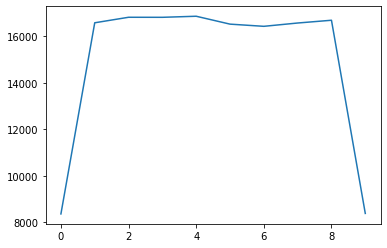

In [211]:
x = [ 0 for x in range(10)]
dx = []
for i in range(1,150000,1):
    d = (round(uniform(1,10,getSeed(i,i,i))))
    dx.append(d)
    x[d-1] = x[d-1] + 1
print(x)
plt.plot(range(0,10),x)

#### Decrease the number of trial

[9, 11, 9, 13, 20, 21, 22, 18, 18, 8]


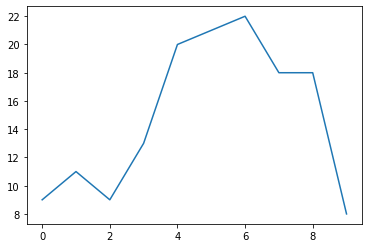

In [197]:
x = [ 0 for x in range(10)]
dx = []
for i in range(1,150,1):
    d = (round(uniform(1,10,getSeed(i*1234,i*2345,i*3456))))
    dx.append(d)
    x[d-1] = x[d-1] + 1
print(x)
plt.plot(range(0,10),x)